In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
X=pd.read_csv('/Users/abhaydeep/Documents/DataScience/DataScience/31.Linear regression/Training Data/Linear_X_Train.csv')
Y=pd.read_csv('/Users/abhaydeep/Documents/DataScience/DataScience/31.Linear regression/Training Data/Linear_Y_Train.csv')

In [8]:

# converting to numpy array 
x=X.values
y=Y.values

(3750, 1)

In [9]:
# for normalization  
u=x.mean()
std=x.std()
x=(x-u)/std

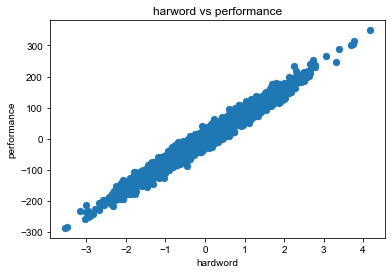

In [10]:
plt.title('harword vs performance')
plt.style.use('seaborn')
plt.xlabel('hardword')
plt.ylabel('performance')
plt.scatter(x,y)
plt.show()

### linear Regression

In [15]:
def hypothesis(X,theta):
    y_=theta[0]+theta[1]*X;
    return y_


def gradient(X,Y,theta):
    
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y=Y[i]
        y_=hypothesis(x,theta)
        
        
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*x
    return grad/m
    
def error(X,Y,theta):    
    totalerror=0.0
    m=X.shape[0]
    for i in range(X.shape[0]):
        y_=hypothesis(X[i],theta)
        totalerror+= (Y[i]-y_)**2
    return totalerror/m
    
    
    
def gradientDescent(X,Y,learningRate=0.01,maxipos=300):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    for i in range (maxipos):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learningRate*grad[0]
        theta[1]=theta[1]-learningRate*grad[1]
        
        
    return error_list,theta,theta_list


    
        
    

In [16]:
error_list,theta,theta_list=gradientDescent(x,y)

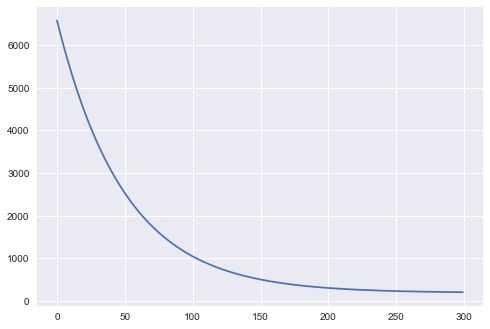

In [17]:
plt.plot(error_list)

## MINI batch gradient descent algo

In [44]:
def miniBatch(X,Y,batch_size=100,learningRate=0.1,maxipos=10):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    
    ## to shuffle the data 
    data=np.hstack((X,Y.reshape(-1,1)))
    
    for i in range (maxipos):
            
            np.random.shuffle(data)
            m=data.shape[0]
            totalbacthes=m//batch_size
            for i in range(totalbacthes):
                batch_data=data[i*batch_size:(i+1)*batch_size,:]
                x_batch=batch_data[:,:-1]
                y_batch=batch_data[:,-1]
                batch_gradient=gradient(x_batch,y_batch,theta)
                theta=theta-learningRate*batch_gradient
                e=error(x_batch,y_batch,theta)
                error_list.append(e)
        
    return error_list,theta,theta_list



In [45]:
error_list,theta,theta_list=miniBatch(x,y)

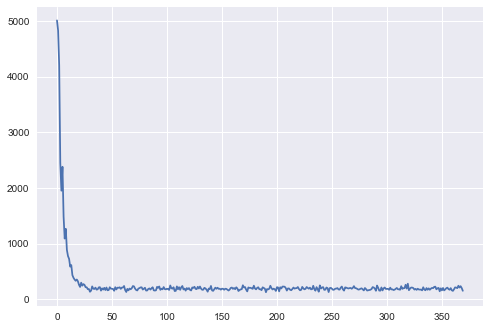

In [40]:
plt.plot(error_list)

In [37]:
theta

array([ 1.14064731, 80.39600499])